**IMPORTING THE DATA AND CHECKING OUT THE DATA**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
pd.set_option('display.max_columns', None)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data = data.drop('customerID', axis = 1)

In [6]:
for column in data.columns:
    print(f"Column: {column}")
    print(data[column].unique())
    print("\n")

Column: gender
['Female' 'Male']


Column: SeniorCitizen
[0 1]


Column: Partner
['Yes' 'No']


Column: Dependents
['No' 'Yes']


Column: tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]


Column: PhoneService
['No' 'Yes']


Column: MultipleLines
['No phone service' 'No' 'Yes']


Column: InternetService
['DSL' 'Fiber optic' 'No']


Column: OnlineSecurity
['No' 'Yes' 'No internet service']


Column: OnlineBackup
['Yes' 'No' 'No internet service']


Column: DeviceProtection
['No' 'Yes' 'No internet service']


Column: TechSupport
['No' 'Yes' 'No internet service']


Column: StreamingTV
['No' 'Yes' 'No internet service']


Column: StreamingMovies
['No' 'Yes' 'No internet service']


Column: Contract
['Month-to-month' 'One year' 'Two year']


Column: PaperlessBilling
['Yes' 'No']


Column: PaymentMethod
['Elect

In [7]:
data_copy = data.copy()
data_copy['SeniorCitizen'] = data_copy['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

# Display the head of the modified column to verify
print(data_copy[['SeniorCitizen']].head())

  SeniorCitizen
0            No
1            No
2            No
3            No
4            No


**SUMMARY STATISTICS**

In [8]:
data_copy.shape

(7043, 20)

In [9]:
data_copy.dtypes

,0
gender,object
SeniorCitizen,object
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [10]:
data_copy['TotalCharges'] = data_copy['TotalCharges'].replace(' ', np.nan)
data_copy['TotalCharges'] = pd.to_numeric(data_copy['TotalCharges'])
data_copy.dtypes

,0
gender,object
SeniorCitizen,object
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [11]:
data.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [32]:
data_copy.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7032,7043
unique,2,2,2,2,8,2,3,3,3,3,3,3,3,3,3,2,4,10,8,2
top,Male,No,No,No,0-8 months,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,$0-9.99,$0-799.99,No
freq,3555,5901,3641,4933,1854,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,1606,3059,5174


**ANSWERING AND VISUALIZING SOME QUESTIONS ABOUT THE DATA**


**ANSWERING THE QUESTION, "WHAT PERCENTAGE OF CUSTOMERS LEFT WITHIN LAST MONTH?"**

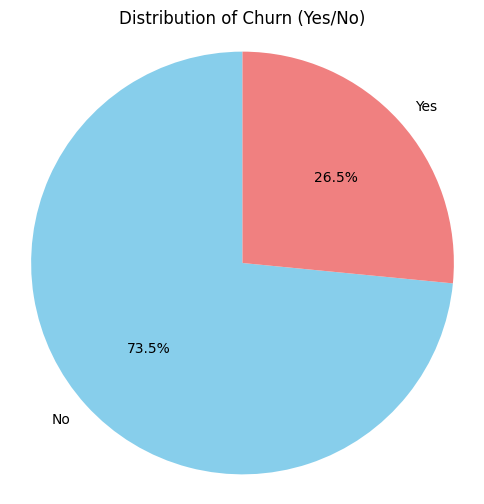

In [14]:
churn_counts = data_copy['Churn'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Churn (Yes/No)')
plt.axis('equal')
plt.show()

So from the pie chart you can see that 26.5% if the customers left

**ANSWERING THE QUESTION, "WHAT KIND OF CUSTOMERS BASED ON CHARGES ARE MORE LIKELY TO LEAVE?"**

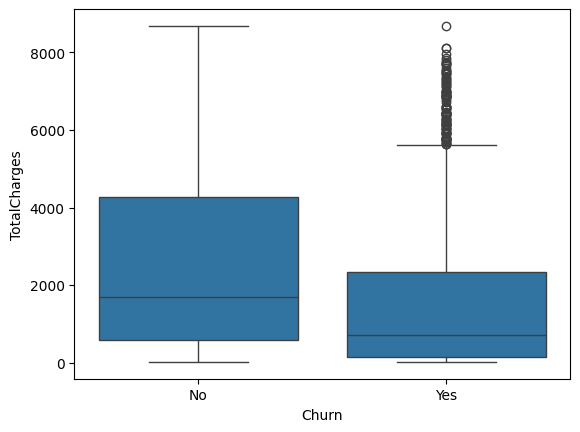

In [15]:
sns.boxplot(data=data_copy, x='Churn', y='TotalCharges')
plt.show()

1. From the box plot you can see that lower paying customers are more likely to leave than higher paying

2. There are also some outliers for some customers who left. (i.e. Some higher paying customers within 6000 - 8000 left too)

**PLOTING A HEATMAP TO VISUALIZE THE RELATIONSHIP BETWEEN FEATURES OF THIS DATASET**

In [22]:
tenure_labels = [f'{i*9}-{((i+1)*9)-1} months' for i in range(8)]
data_copy['tenure'] = pd.cut(data_copy['tenure'], bins=8, labels=tenure_labels, include_lowest=True)


monthly_charges_labels = [f'${i*10}-{((i+1)*10)-0.01}' for i in range(10)]
data_copy['MonthlyCharges'] = pd.cut(data_copy['MonthlyCharges'], bins=10, labels=monthly_charges_labels, include_lowest=True)

total_charges_labels = [f'${i*800}-{((i+1)*800)-0.01}' for i in range(8)]
data_copy['TotalCharges'] = pd.cut(data_copy['TotalCharges'], bins=8, labels=total_charges_labels, include_lowest=True)

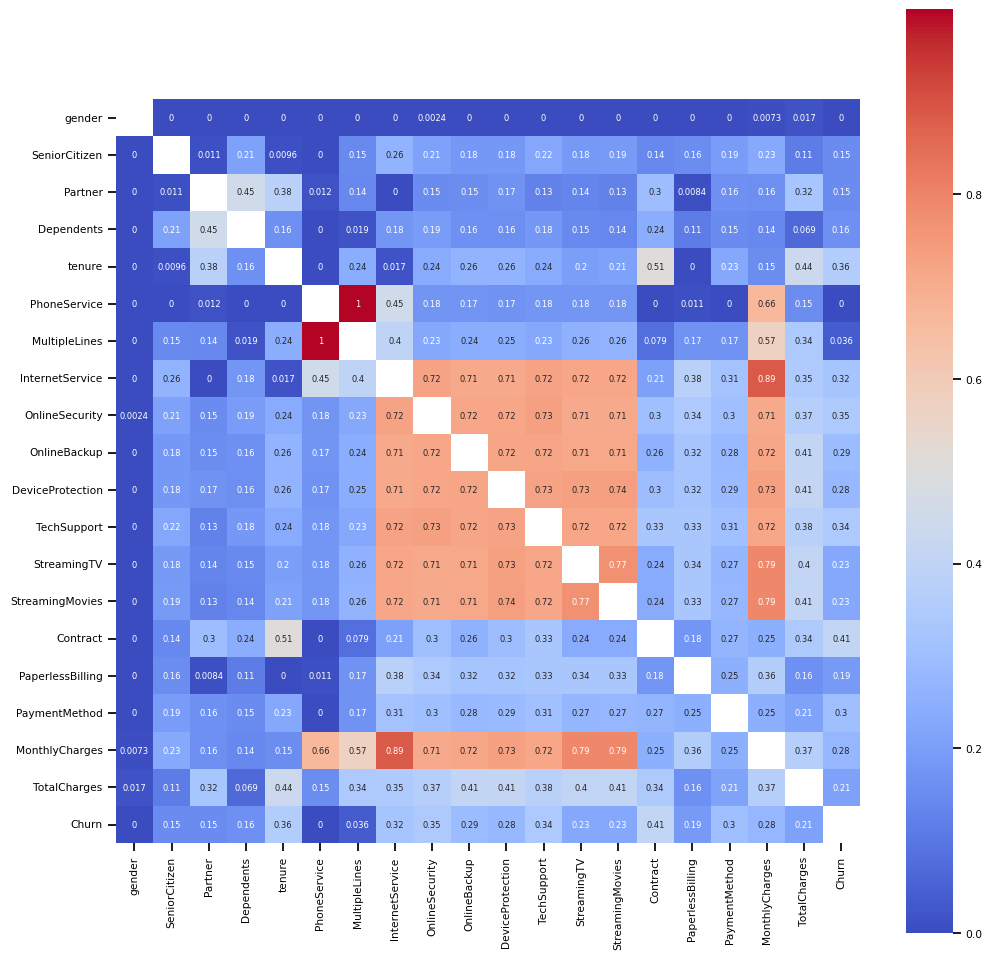

In [24]:
from scipy.stats import chi2_contingency
corr_matrix = pd.get_dummies(data_copy).corr()
cramers_v_matrix = pd.DataFrame(index = data_copy.columns, columns = data_copy.columns)
for col1 in data_copy.columns:
    for col2 in data_copy.columns:
        if col1 != col2:
            contingency_table = pd.crosstab(data_copy[col1], data_copy[col2])
            chi2 = chi2_contingency(contingency_table)[0]
            n = contingency_table.sum().sum()
            r,k = contingency_table.shape
            phi2 = chi2/n
            phi2corr = max(0, phi2-(k-1)*(r-1)/(n-1))
            rcorr = r - ((r-1)**2)/(n-1)
            kcorr = k - ((k-1)**2)/(n-1)
            cramers_v = np.sqrt(phi2corr/ min((kcorr-1), (rcorr-1)))

            cramers_v_matrix.loc[col1, col2] = cramers_v
cramers_v_matrix = cramers_v_matrix.apply(pd.to_numeric, errors ='coerce')

plt.figure(figsize=(12, 12))

sns.set_context("notebook", font_scale=0.7)

sns.heatmap(cramers_v_matrix, annot = True, cmap='coolwarm', square = True, annot_kws={"size": 6})
plt.show()

sns.set_context("notebook", font_scale=1)

SUMMARY OF RELATIONSHIP ANALYSIS
1. Looking at the target feature "Churn", it doesn't have much correlation with any of the other features. But it does show a notable correlation with Contract, InternetService, phoneService and tenure.
This could mean that it is a combination of various factors(Not just one Feature) that contribute to the probability of a customer leaving the business or not.

2. Across the whole heatmap, you'll see some features that have high correlation with each other such as DeviceProtection and TotalCharges, StreamingMovies and total charges e.t.c. The highest being monthly charges and internetService.
This makes sense. For example the high correlation between monthly charges and internetService shows that who have a certain kind of internet service would be charged more.

VISUALIZING SOME PATTERNS IN THE DATA IN MORE DETAIL

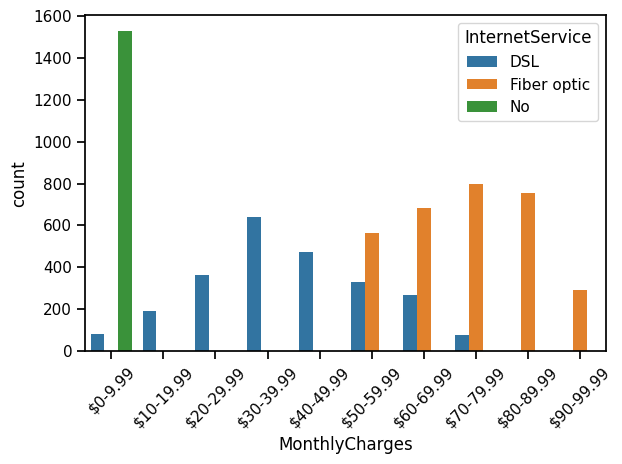

In [26]:
sns.countplot(x = 'MonthlyCharges', hue = 'InternetService', data = data_copy)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

From the countplot above, you can see that those with No internet service are all charged low, those with optic fibre are charged more while those with DSL have charges inbetween.

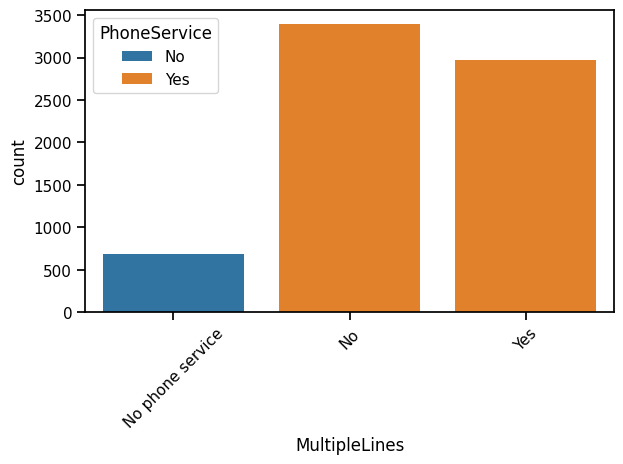

In [29]:
sns.countplot(x = 'MultipleLines', hue = 'PhoneService', data = data_copy)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

From the countplot above you can see that all those with no phone service cannot have multiple lines. Only those who have phone service can have one or multiple lines.